| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Regresion.ipynb)| [⏩](./4.Clustering.ipynb)|

# **3. Clasificación**

## **Regresión Logística**

La regresión logística es una técnica de aprendizaje supervisado que se utiliza para predecir la probabilidad de que una observación pertenezca a una clase particular, en base a un conjunto de variables predictoras (o características). Es una técnica útil para problemas de clasificación binaria, donde la variable de respuesta es categórica y solo puede tomar dos valores posibles, por ejemplo, `"sí"` o `"no"`, `"verdadero"` o `"falso"`, `"enfermo"` o `"sano"`, etc.

La regresión logística utiliza una función logística (también conocida como función `sigmoide`) para modelar la relación entre las variables predictoras y la variable de respuesta. La función `sigmoide` tiene la forma:

$f(z) = 1 / (1 + np.exp(-z))$

Donde $z$ es la suma ponderada de las características de entrada y sus respectivos coeficientes. Es decir:

$z = beta_0 + beta_1*x_1 + beta_2*x_2 + ... + beta_p*x_p$

Donde $x_1, x_2, ..., x_p$ son las características de entrada, $\beta_0, \beta_1, \beta_2, ..., \beta_p$ son los coeficientes correspondientes y $p$ es el número de características.

La función logística transforma la suma ponderada $z$ en un valor entre `0` y `1`, que representa la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, `"sí"`, `"verdadero"`, `"enfermo"`, etc.). Si la probabilidad es mayor que un umbral determinado (generalmente `0.5`), la observación se clasifica como positiva; de lo contrario, se clasifica como negativa.

Veamos un ejemplo de cómo implementar la regresión logística en Python con la biblioteca `Scikit-learn`:


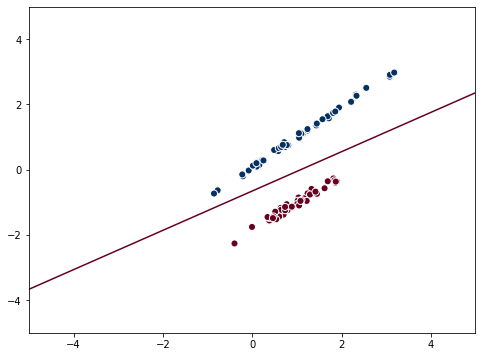

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar una malla de puntos para graficar las regiones de decisión
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Graficar los datos y las regiones de decisión
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="RdBu")
ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", edgecolor="white", linewidth=1)

plt.show()

En este ejemplo, estamos generando datos de ejemplo con la función `make_classification` de `Scikit-learn`, que crea un conjunto de datos con dos características y dos clases. Luego, entrenamos un modelo de regresión logística con la función `LogisticRegression` de `Scikit-learn` y graficamos las regiones de decisión

La regresión logística es un algoritmo de aprendizaje supervisado utilizado en el campo del machine learning para problemas de clasificación. A diferencia de la regresión lineal, que se utiliza para problemas de regresión, la regresión logística se emplea cuando queremos predecir la probabilidad de que una observación pertenezca a una clase específica.

La utilidad de la regresión logística radica en su capacidad para modelar la relación entre variables independientes (características) y una variable dependiente categórica binaria (clase objetivo). Puede ayudarnos a comprender cómo influyen las características en la probabilidad de que una observación pertenezca a una clase en particular. Algunos ejemplos de su aplicación incluyen diagnósticos médicos, detección de fraudes, análisis de riesgos crediticios, entre otros.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré una gráfica para visualizar los resultados.

Supongamos que tenemos un conjunto de datos que representa el rendimiento de los estudiantes en dos exámenes y queremos predecir si un estudiante será admitido en una universidad o no. Aquí está el `dataframe` ficticio que utilizaremos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Crear el dataframe
data = {'Examen 1': [75, 60, 90, 85, 50, 75, 85, 90],
        'Examen 2': [85, 70, 95, 75, 45, 60, 95, 80],
        'Admitido': [1, 0, 1, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Examen 1`" y "`Examen 2`" representan las calificaciones obtenidas por los estudiantes en los dos exámenes, mientras que la columna "`Admitido`" indica si el estudiante fue admitido (`1`) o no (`0`).

A continuación, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`):

In [2]:
X = df[['Examen 1', 'Examen 2']]
y = df['Admitido']

Luego, crearemos una instancia del modelo de regresión logística y lo entrenaremos con los datos:

In [3]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Después de entrenar el modelo, podemos obtener las predicciones y también calcular las probabilidades de que cada estudiante sea admitido o no:

In [4]:
predicciones = model.predict(X)
probabilidades = model.predict_proba(X)[:, 1]

Para visualizar los resultados, podemos crear un gráfico de dispersión con las calificaciones de los exámenes y usar colores diferentes para representar las clases predichas:

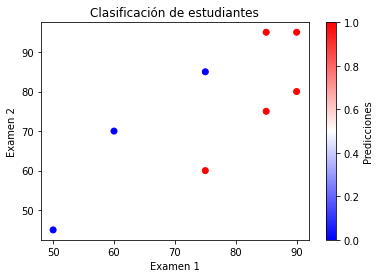

In [5]:
# Graficar los puntos de datos
plt.scatter(df['Examen 1'], df['Examen 2'], c=predicciones, cmap='bwr')
plt.xlabel('Examen 1')
plt.ylabel('Examen 2')

# Agregar una leyenda
plt.colorbar(label='Predicciones')
plt.title('Clasificación de estudiantes')

# Mostrar el gráfico
plt.show()

En el gráfico resultante, los puntos de datos se representarán con colores diferentes según la clase predicha por el modelo de regresión logística. Esto nos permitirá visualizar cómo se separan las clases en función de las calificaciones en los exámenes.

La regresión logística buscará encontrar una frontera de decisión que divida los puntos de datos en diferentes clases. Esta frontera se representa como una línea recta en un gráfico bidimensional (como en este ejemplo), o como un hiperplano en un espacio de mayor dimensión.

Recuerda que este es solo un ejemplo básico para comprender el concepto de regresión logística y cómo se puede aplicar a un conjunto de datos. En aplicaciones más complejas, es posible que se necesiten técnicas adicionales como la selección de características, regularización y validación cruzada para obtener mejores resultados.

## **K-Nearest Neighbors (K-NN)**

`K-Nearest Neighbors` `(K-NN)` es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. La idea detrás del algoritmo es que los puntos de datos similares a menudo tienden a estar cerca unos de otros. Por lo tanto, si queremos predecir la clase de un punto de datos desconocido, podemos buscar los `k` puntos de datos más cercanos en el conjunto de entrenamiento y usar la mayoría de las clases de estos puntos para predecir la clase del punto de datos desconocido.

En el caso de la regresión, se utiliza la media de los `k` puntos de datos más cercanos para predecir el valor de un punto de datos desconocido.

El valor de `k` se elige previamente y tiene un impacto significativo en la precisión de la predicción. Un valor de `k` pequeño significa que la predicción se basa en un número limitado de puntos de datos cercanos, lo que puede hacer que la predicción sea más sensible a los valores atípicos. Por otro lado, un valor de `k` grande significa que se considera un número más grande de puntos de datos cercanos, lo que puede reducir la precisión de la predicción.

Aquí hay un ejemplo en Python que muestra cómo usar `K-NN` para la clasificación:

La clase predicha para el punto de datos es: [0]


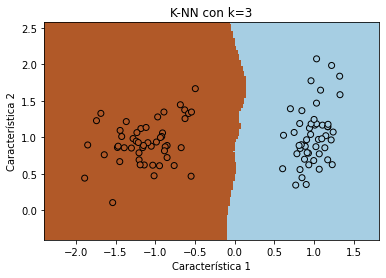

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generamos un conjunto de datos de clasificación sintéticos
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
# Definimos el modelo K-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Ajustamos el modelo a los datos de entrenamiento
knn.fit(X, y)

# Predecimos la clase de un nuevo punto de datos
new_data = np.array([[0.2, 0.8]])
pred = knn.predict(new_data)
print("La clase predicha para el punto de datos es:", pred)

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('K-NN con k=3')
plt.show()

En este ejemplo, creamos un conjunto de datos de clasificación sintéticos con dos características. Luego, definimos un modelo `K-NN` con `k=3` y lo ajustamos a los datos de entrenamiento. Finalmente, utilizamos el modelo para predecir la clase de un nuevo punto de datos y creamos un mapa de calor.

K-Nearest Neighbors (`K-NN`) es un algoritmo de aprendizaje supervisado utilizado en el campo del machine learning para problemas de clasificación y regresión. En el caso de la clasificación, se basa en la idea de que las observaciones similares tienden a pertenecer a la misma clase. `K-NN` asigna una etiqueta a una observación desconocida basándose en las etiquetas de las observaciones vecinas más cercanas en un espacio de características.

La utilidad del algoritmo `K-NN` radica en su simplicidad y facilidad de implementación, además de ser efectivo en muchos escenarios. Algunas aplicaciones típicas incluyen reconocimiento facial, filtrado de recomendaciones, reconocimiento de patrones, entre otros.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré una gráfica para visualizar los resultados.

Supongamos que tenemos un conjunto de datos que contiene información sobre flores, incluyendo su longitud y ancho de pétalos, así como su especie. Queremos predecir la especie de una nueva flor basándonos en estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Crear el dataframe
data = {'Longitud_pétalo': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0],
        'Ancho_pétalo': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.1],
        'Especie': ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica']}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Longitud_pétalo`" y "`Ancho_pétalo`" representan las características de las flores, mientras que la columna "`Especie`" indica la especie a la que pertenecen.

A continuación, convertiremos las etiquetas de especie a valores numéricos utilizando la codificación de etiquetas (`LabelEncoder`) de la biblioteca `scikit-learn`:

In [7]:
encoder = LabelEncoder()
df['Especie'] = encoder.fit_transform(df['Especie'])

Luego, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`):

In [8]:
X = df[['Longitud_pétalo', 'Ancho_pétalo']]
y = df['Especie']

A continuación, crearemos una instancia del modelo `K-NN` y lo entrenaremos con los datos:

In [9]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Después de entrenar el modelo, podemos obtener las predicciones para nuevas flores:

In [10]:
nuevas_flores = pd.DataFrame({'Longitud_pétalo': [4.8, 5.2], 'Ancho_pétalo': [3.2, 3.8]})
predicciones = model.predict(nuevas_flores)

Para visualizar los resultados, podemos crear un gráfico de dispersión con las características de las flores y usar colores diferentes para representar las clases predichas:

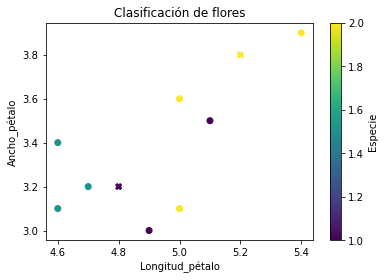

In [11]:
# Graficar los puntos de datos
plt.scatter(df['Longitud_pétalo'], df['Ancho_pétalo'], c=df['Especie'], cmap='viridis')
plt.scatter(nuevas_flores['Longitud_pétalo'], nuevas_flores['Ancho_pétalo'], c=predicciones, cmap='viridis', marker='X')
plt.xlabel('Longitud_pétalo')
plt.ylabel('Ancho_pétalo')

# Agregar una leyenda
plt.colorbar(label='Especie')
plt.title('Clasificación de flores')

# Mostrar el gráfico
plt.show()

En el gráfico resultante, los puntos de datos existentes se representarán con colores diferentes según su especie real, mientras que las nuevas flores se representarán con una '`X`' y se colorearán según la clase predicha por el modelo `K-NN`.

Recuerda que la elección del valor de `K` (número de vecinos más cercanos) puede influir en los resultados. Es importante encontrar un valor adecuado de `K` mediante técnicas de validación cruzada u otros métodos de selección de hiperparámetros. Además, el preprocesamiento adecuado de los datos, como la normalización, también puede ser beneficioso en algunos casos.

## **Support Vector Machine (SVM)**

`Support Vector Machine` `(SVM)` es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. La idea detrás del algoritmo es encontrar un `hiperplano` que separe los puntos de datos de diferentes clases en el espacio de características de manera óptima.

En el caso de la clasificación binaria, se busca un `hiperplano` que separe los puntos de datos de las dos clases de manera que la distancia entre el `hiperplano` y los puntos de datos más cercanos de cada clase (conocidos como vectores de soporte) sea máxima. Esta distancia se conoce como margen y se busca maximizarla durante el entrenamiento del modelo. El `hiperplano` óptimo se encuentra mediante la optimización de una función objetivo que tiene en cuenta la distancia entre los vectores de soporte y el `hiperplano`.

Si los datos no son linealmente separables, se puede utilizar una técnica llamada `kernel trick` para transformar los datos en un espacio de características de mayor dimensión en el que los datos sí son linealmente separables.

Aquí hay un ejemplo en Python que muestra cómo usar `SVM` para la clasificación:

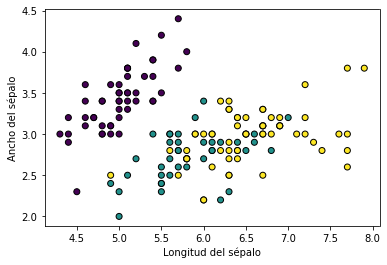

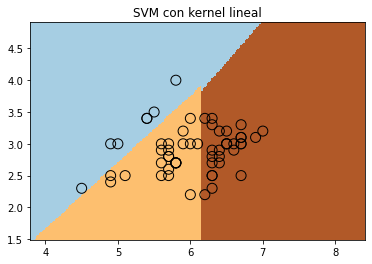

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo SVM con kernel lineal
svm = SVC(kernel='linear', C=1, random_state=0)
# Ajustamos el modelo a los datos de entrenamiento
svm.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los vectores de soporte
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('SVM con kernel lineal')
plt.show()

En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `SVM` con `kernel` lineal y parámetro de regularización `C=1`. Ajustamos el modelo a los datos.

El `Support Vector Machine` (`SVM`) es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como para problemas de regresión. Su objetivo principal es encontrar un hiperplano en un espacio de características que mejor separe las clases de datos. En el caso de la clasificación, el `SVM` busca maximizar la distancia entre los puntos de datos más cercanos de diferentes clases, denominados vectores de soporte.

La utilidad del algoritmo `SVM` radica en su capacidad para manejar datos linealmente separables y también datos que no son linealmente separables mediante el uso de funciones de `kernel`. Algunas aplicaciones típicas incluyen reconocimiento de imágenes, detección de fraudes, clasificación de textos, entre otros.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré una gráfica para visualizar los resultados.

Supongamos que tenemos un conjunto de datos que contiene información sobre `flores`, incluyendo la longitud y el ancho de los pétalos, así como su especie. Queremos predecir la especie de una nueva `flor` basándonos en estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Crear el dataframe
data = {'Longitud_pétalo': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0],
        'Ancho_pétalo': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.1],
        'Especie': ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica']}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Longitud_pétalo`" y "`Ancho_pétalo`" representan las características de las `flores`, mientras que la columna "`Especie`" indica la especie a la que pertenecen.

A continuación, convertiremos las etiquetas de especie a valores numéricos utilizando la codificación de etiquetas (`LabelEncoder`) de la biblioteca `scikit-learn`:

In [13]:
encoder = LabelEncoder()
df['Especie'] = encoder.fit_transform(df['Especie'])

Luego, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`):

In [14]:
X = df[['Longitud_pétalo', 'Ancho_pétalo']]
y = df['Especie']

A continuación, crearemos una instancia del modelo `SVM` y lo entrenaremos con los datos:

In [15]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

Después de entrenar el modelo, podemos obtener las predicciones para nuevas flores:

In [16]:
nuevas_flores = pd.DataFrame({'Longitud_pétalo': [4.8, 5.2], 'Ancho_pétalo': [3.2, 3.8]})
predicciones = model.predict(nuevas_flores)

Para visualizar los resultados, podemos crear un gráfico de dispersión con las características de las flores y usar colores diferentes para representar las clases predichas:

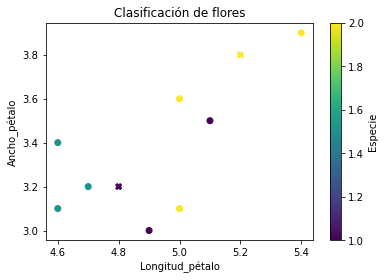

In [17]:
# Graficar los puntos de datos
plt.scatter(df['Longitud_pétalo'], df['Ancho_pétalo'], c=df['Especie'], cmap='viridis')
plt.scatter(nuevas_flores['Longitud_pétalo'], nuevas_flores['Ancho_pétalo'], c=predicciones, cmap='viridis', marker='X')
plt.xlabel('Longitud_pétalo')
plt.ylabel('Ancho_pétalo')

# Agregar una leyenda
plt.colorbar(label='Especie')
plt.title('Clasificación de flores')

# Mostrar el gráfico
plt.show()

En el gráfico resultante, los puntos de datos existentes se representarán con colores diferentes según su especie real, mientras que las nuevas flores se representarán con una '`X`' y se colorearán según la clase predicha por el modelo `SVM`.

Recuerda que la elección del `kernel` puede influir en la capacidad del modelo para separar los datos. En este ejemplo, se utilizó un `kernel lineal`, pero también se pueden probar `kernels` no lineales, como el `kernel RBF` (`Radial Basis Function`) o el `kernel polinomial`, dependiendo de la naturaleza de los datos. Además, al igual que con otros algoritmos, el preprocesamiento adecuado de los datos, como la normalización, también puede ser beneficioso en algunos casos.

## **Kernel SVM**

`Kernel SVM` es una variante del algoritmo `SVM` que utiliza una función `kernel` para transformar los datos en un espacio de características de mayor dimensión, lo que permite la separación de datos no linealmente separables en el espacio de características original.

El truco del kernel es una técnica que permite la transformación de los datos de entrada en un espacio de características de mayor dimensión sin tener que calcular explícitamente los valores transformados. En su lugar, se utiliza una función `kernel` que calcula el producto escalar de los datos transformados. Los `kernels` más comúnmente utilizados son el `kernel lineal`, el `kernel polinómico` y el `kernel gaussiano` (también conocido como `RBF`).

Aquí hay un ejemplo en Python que muestra cómo utilizar el `kernel SVM` para la clasificación:

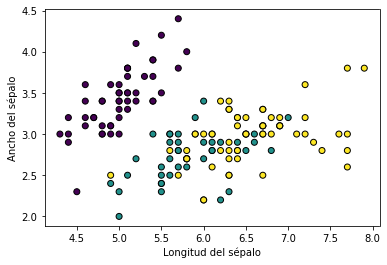

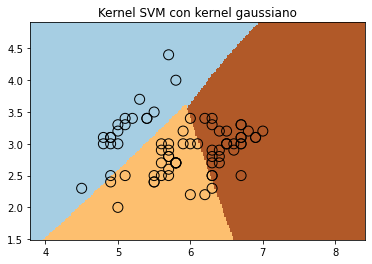

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo SVM con kernel gaussiano
svm = SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)
# Ajustamos el modelo a los datos de entrenamiento
svm.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los vectores de soporte
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Kernel SVM con kernel gaussiano')
plt.show()

En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `SVM` con `kernel gaussiano` y parámetros de regularización `C=1` y `gamma=0.1`. Ajustamos el modelo a los datos de entrenamiento y creamos un mapa de calor de la superficie de decisión del modelo. También graficamos los vectores de soporte del modelo.

En general, el `kernel SVM` es útil cuando los datos no son linealmente separables y se necesita una forma de transformar los datos para poder separarlos mediante un hiperplano.

El `Kernel SVM` (`Support Vector Machine`) es una extensión del algoritmo `SVM` que permite manejar datos no linealmente separables al mapearlos a un espacio de características de mayor dimensión. El `kernel` es una función que calcula el producto interno entre dos vectores en este espacio de características y permite realizar cálculos eficientes sin la necesidad de calcular explícitamente las transformaciones de los datos.

La utilidad del `Kernel SVM` radica en su capacidad para resolver problemas de clasificación que no pueden ser separados linealmente en el espacio de características original. Al usar funciones de `kernel` adecuadas, como el `kernel polinomial` o el `kernel RBF` (`Radial Basis Function`), el `Kernel SVM` puede aprender fronteras de decisión más complejas y capturar relaciones no lineales entre las características.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré la gráfica del modelo entrenado.

Supongamos que tenemos un conjunto de datos que contiene información sobre flores, incluyendo la longitud y el ancho de los pétalos, así como su especie. Queremos clasificar las flores en función de estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Crear el dataframe
data = {'Longitud_pétalo': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0],
        'Ancho_pétalo': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.1],
        'Especie': ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica']}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Longitud_pétalo`" y "`Ancho_pétalo`" representan las características de las flores, mientras que la columna "`Especie`" indica la especie a la que pertenecen.

A continuación, convertiremos las etiquetas de especie a valores numéricos utilizando la codificación de etiquetas (`LabelEncoder`) de la biblioteca `scikit-learn`:

In [19]:
encoder = LabelEncoder()
df['Especie'] = encoder.fit_transform(df['Especie'])

Luego, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`):

In [20]:
X = df[['Longitud_pétalo', 'Ancho_pétalo']]
y = df['Especie']

A continuación, crearemos una instancia del modelo `SVM` con un `kernel RBF` y lo entrenaremos con los datos:

In [21]:
model = SVC(kernel='rbf')
model.fit(X, y)

SVC()

Después de entrenar el modelo, podemos obtener las predicciones para todos los puntos del espacio de características para visualizar las fronteras de decisión:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


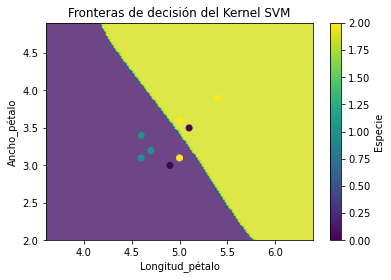

In [22]:
import numpy as np

# Generar una cuadrícula de puntos en el espacio de características
x_min, x_max = X['Longitud_pétalo'].min() - 1, X['Longitud_pétalo'].max() + 1
y_min, y_max = X['Ancho_pétalo'].min() - 1, X['Ancho_pétalo'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Dar forma a los resultados para que coincidan con la cuadrícula
Z = Z.reshape(xx.shape)

# Graficar las fronteras de decisión y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X['Longitud_pétalo'], X['Ancho_pétalo'], c=y, cmap='viridis')

# Agregar una leyenda
plt.colorbar(label='Especie')
plt.xlabel('Longitud_pétalo')
plt.ylabel('Ancho_pétalo')
plt.title('Fronteras de decisión del Kernel SVM')

# Mostrar el gráfico
plt.show()

En la gráfica resultante, las fronteras de decisión se visualizarán como regiones de diferentes colores, y los puntos de datos se representarán con colores según su especie. El `Kernel SVM` aprende estas fronteras de decisión complejas en el espacio de características de mayor dimensión y las proyecta de vuelta al espacio de características original para realizar las clasificaciones.

Recuerda que la elección del `kernel` puede influir en la capacidad del modelo para separar los datos de manera efectiva. En este ejemplo, se utilizó el `kernel RBF`, pero también se pueden probar otros `kernels`, como el `kernel polinomial`, para adaptarse mejor a los datos y mejorar el rendimiento del modelo. Además, el ajuste de los `hiperparámetros` del modelo, como el parámetro de regularización `C` y el ancho de banda del `kernel RBF`, puede ser necesario para obtener mejores resultados.

## **Naive Bayes**

`Naive Bayes` es un algoritmo de aprendizaje supervisado que se utiliza para clasificar datos en diferentes categorías. Utiliza el teorema de Bayes para calcular la probabilidad de que un punto de datos pertenezca a una determinada categoría dada su distribución de características. El algoritmo se llama `"naive"` porque asume que todas las características son independientes entre sí, lo que simplifica enormemente el cálculo de las probabilidades.

Hay tres tipos diferentes de `Naive Bayes` que se pueden utilizar en función de la naturaleza de los datos: `Naive Bayes Gaussiano`, `Naive Bayes Multinomial` y `Naive Bayes Bernoulli`.

Aquí hay un ejemplo en Python que muestra cómo utilizar `Naive Bayes Gaussiano` para la clasificación:

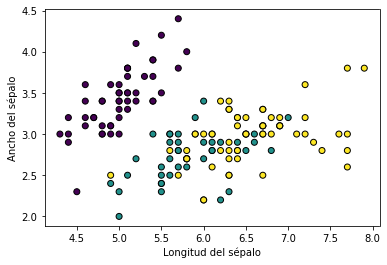

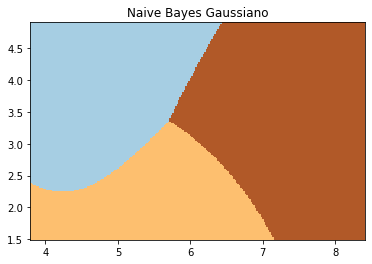

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo Naive Bayes Gaussiano
gnb = GaussianNB()
# Ajustamos el modelo a los datos de entrenamiento
gnb.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.title('Naive Bayes Gaussiano')
plt.show()

En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `Naive Bayes Gaussiano`. Ajustamos el modelo a los datos de entrenamiento y creamos un mapa de calor de la superficie de decisión del modelo.

En general, `Naive Bayes` es útil cuando se tienen datos `categóricos` o `discretos` y se necesita una forma rápida y eficiente de clasificarlos.

`Naive Bayes` es un algoritmo de aprendizaje supervisado basado en el teorema de `Bayes`, que asume una independencia condicional entre las características. A pesar de esta suposición simplificadora, el algoritmo `Naive Bayes` es ampliamente utilizado debido a su simplicidad, rapidez y buen rendimiento en muchas tareas de clasificación.

La utilidad del algoritmo `Naive Bayes` radica en su capacidad para realizar clasificaciones eficientes en conjuntos de datos grandes y de alta dimensionalidad. Es especialmente efectivo cuando las características son independientes o cuando la dependencia entre características es débil. Además, `Naive Bayes` es robusto ante la presencia de características irrelevantes o redundantes en los datos.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré la gráfica del modelo entrenado.

Supongamos que tenemos un conjunto de datos que contiene información sobre correos electrónicos y su clasificación como spam o no spam, junto con las palabras clave utilizadas en cada correo electrónico. Queremos construir un modelo de `Naive Bayes` para clasificar nuevos correos electrónicos como spam o no spam. Aquí está el `dataframe` ficticio que utilizaremos:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Crear el dataframe
data = {'Correo': ['Oferta especial, descuento increíble', 'Ganador del premio, llama ahora', 'Envío confirmado, número de seguimiento'],
        'Clasificacion': ['spam', 'spam', 'no spam']}

df = pd.DataFrame(data)

En este ejemplo, la columna "`Correo`" contiene los textos de los correos electrónicos y la columna "`Clasificacion`" indica si cada correo electrónico es spam o no spam.

A continuación, convertiremos los textos de los correos electrónicos en una representación numérica utilizando la técnica de bolsa de palabras (`Bag of Words`). Utilizaremos la clase `CountVectorizer` de `scikit-learn` para contar la frecuencia de las palabras en los textos:

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Correo'])
y = df['Clasificacion']

El objeto `X` representa las características del modelo, donde cada fila corresponde a un correo electrónico y cada columna representa una palabra única en el conjunto de datos.

A continuación, crearemos una instancia del modelo `Naive Bayes` y lo entrenaremos con los datos:

In [25]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

Después de entrenar el modelo, podemos obtener las predicciones para nuevos correos electrónicos:

In [26]:
nuevos_correos = ['¡Ganaste un premio!', 'Oferta de trabajo, envía tu CV']
nuevos_correos_transformados = vectorizer.transform(nuevos_correos)
predicciones = model.predict(nuevos_correos_transformados)

Para visualizar los resultados, podemos crear un gráfico de barras que muestre la proporción de spam y no spam en los nuevos correos electrónicos:

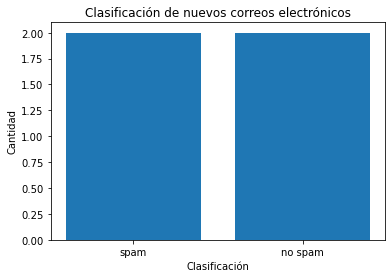

In [27]:
etiquetas = ['spam', 'no spam']
conteo_predicciones = pd.Series(predicciones).value_counts()

plt.bar(etiquetas, conteo_predicciones)
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
plt.title('Clasificación de nuevos correos electrónicos')
plt.show()

En el gráfico resultante, las barras representan la cantidad de correos electrónicos clasificados como spam y no spam. Esto proporciona una visualización de la clasificación realizada por el modelo `Naive Bayes` para los nuevos correos electrónicos.

Recuerda que el ejemplo utilizado es simplificado y que en casos reales de clasificación de texto, se requerirá un preprocesamiento más completo y sofisticado, como la eliminación de palabras irrelevantes, la lematización o el uso de técnicas más avanzadas de procesamiento de lenguaje natural.

## **Clasificación con arboles de Decisión**

La clasificación con árboles de decisión es un algoritmo de aprendizaje supervisado que se utiliza para clasificar datos en diferentes categorías. Funciona mediante la creación de un árbol de decisiones a partir de los datos de entrenamiento, donde cada nodo del árbol representa una característica y cada rama representa una posible respuesta a esa característica. Los árboles de decisión son particularmente útiles porque son fáciles de entender y visualizar, lo que puede ser útil para la toma de decisiones.

Aquí hay un ejemplo en Python que muestra cómo utilizar árboles de decisión para la clasificación:

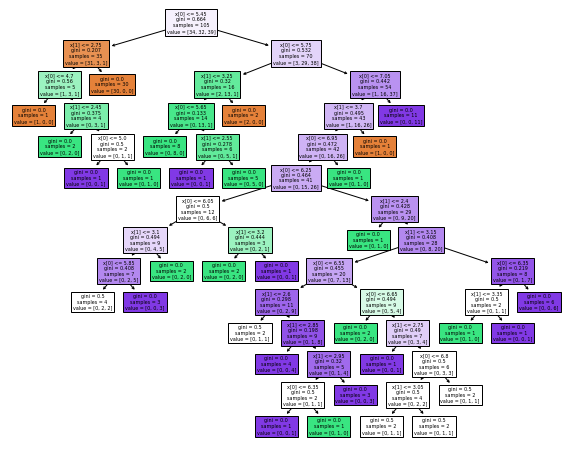

Accuracy: 0.6666666666666666


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo de árbol de decisión y lo ajustamos a los datos de entrenamiento
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Graficamos el árbol de decisión
plt.figure(figsize=(10,8))
plot_tree(dtc, filled=True)
plt.show()

# Evaluamos el modelo en los datos de prueba
score = dtc.score(X_test, y_test)
print(f'Accuracy: {score}')

En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo de árbol de decisión. Ajustamos el modelo a los datos de entrenamiento y graficamos el árbol de decisión resultante. Finalmente, evaluamos el modelo en los datos de prueba y mostramos su precisión.

El resultado de la ejecución del código anterior debería ser un árbol de decisión que representa cómo el modelo toma decisiones basadas en las características de entrada. Cada nodo representa una característica y las ramas representan las posibles respuestas a esa característica. En este ejemplo, el árbol de decisión se utiliza para clasificar los puntos de datos en tres categorías diferentes de `iris` en función de la `longitud` y el `ancho` del sépalo.

En general, los árboles de decisión son útiles cuando se tienen datos con múltiples características y se necesita una forma fácil de entender y visualizar cómo se toman las decisiones de clasificación. Sin embargo, es importante tener en cuenta que los árboles de decisión pueden ser propensos a sobreajuste si no se ajustan adecuadamente, por lo que se debe prestar atención a la regularización y a la poda del árbol.

La clasificación con árboles de decisión es un algoritmo de aprendizaje supervisado utilizado para resolver problemas de clasificación. Los árboles de decisión son estructuras en forma de árbol que representan una serie de decisiones y posibles resultados en función de las características de los datos de entrada. Cada nodo del árbol representa una característica y cada rama representa una posible condición o valor de esa característica. El objetivo es llegar a una hoja del árbol que represente la clasificación final.

La utilidad de los árboles de decisión radica en su capacidad para manejar datos numéricos y categóricos, su interpretabilidad y su facilidad de uso. Los árboles de decisión también pueden manejar características faltantes y son robustos ante datos ruidosos o atípicos.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré la gráfica del modelo entrenado.

Supongamos que tenemos un conjunto de datos que contiene información sobre frutas, incluyendo su color, sabor y clasificación como "`manzana`" o "`naranja`". Queremos construir un modelo de árbol de decisión para clasificar nuevas frutas en función de estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Crear el dataframe
data = {'Color': ['Rojo', 'Amarillo', 'Rojo', 'Verde', 'Verde'],
        'Sabor': ['Dulce', 'Dulce', 'Ácido', 'Ácido', 'Dulce'],
        'Clasificacion': ['Manzana', 'Manzana', 'Naranja', 'Naranja', 'Manzana']}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Color`" y "`Sabor`" representan las características de las frutas, mientras que la columna "`Clasificacion`" indica si cada fruta es una manzana o una naranja.

A continuación, convertiremos las características categóricas en valores numéricos utilizando la codificación `one-hot` (binaria) con la función `get_dummies` de pandas:

In [3]:
# Codificar características categóricas
df_encoded = pd.get_dummies(df.drop('Clasificacion', axis=1))
X = df_encoded
y = df['Clasificacion']

El objeto `X` representa las características del modelo, mientras que el objeto y representa las etiquetas o clasificaciones correspondientes a las frutas.

A continuación, crearemos una instancia del modelo de árbol de decisión y lo entrenaremos con los datos:

In [4]:
# Crear y entrenar el modelo
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Después de entrenar el modelo, podemos generar el gráfico del árbol de decisión utilizando la función `plot_tree` de scikit-learn:

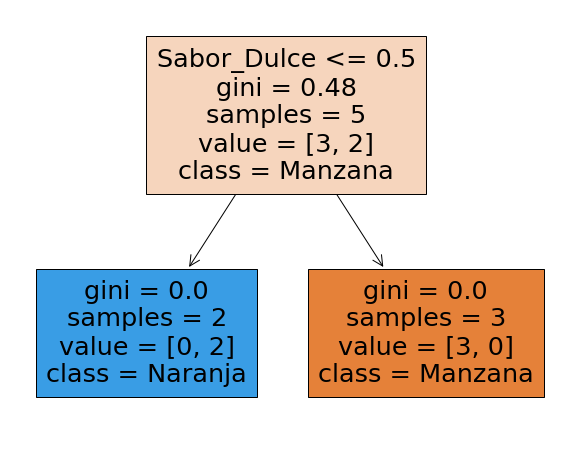

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

En la gráfica resultante, se visualizará el árbol de decisión con sus nodos y ramas. Los nodos internos representan las características y las condiciones para tomar decisiones, mientras que las hojas representan las clasificaciones finales.

Recuerda que los árboles de decisión pueden ser más complejos y profundos en casos reales con conjuntos de datos más grandes y más características. Además, es importante ajustar los hiperparámetros del modelo, como la profundidad máxima del árbol o el criterio de división, para obtener un modelo óptimo y evitar el sobreajuste.

## **Clasificación con Bosques Aleatorios**

La clasificación con Bosques Aleatorios `(Random Forest Classification)` es un algoritmo de aprendizaje automático que se utiliza para la clasificación y regresión de datos. Es una técnica de conjunto `(ensemble)` que se basa en la creación de múltiples árboles de decisión y la combinación de sus resultados para obtener una predicción más precisa.

En los Bosques Aleatorios, se crean múltiples árboles de decisión, cada uno entrenado con una muestra aleatoria del conjunto de datos de entrenamiento y una selección aleatoria de características. Esto se hace para evitar el sobreajuste `(overfitting)` y mejorar la precisión de la predicción.

El proceso de entrenamiento se realiza de la siguiente manera:

1. Se selecciona una muestra aleatoria del conjunto de datos de entrenamiento.
2. Selecciona un conjunto aleatorio de características para cada árbol.
3. Se construyen varios árboles de decisión basados en la muestra aleatoria y las características seleccionadas.
4. Selecciona el mejor árbol de decisión utilizando algún criterio de evaluación (por ejemplo, la exactitud o la tasa de error).
5. Se repiten los pasos 1-4 varias veces para obtener una buena precisión de predicción.

Para realizar una predicción con un Bosque Aleatorio, se realiza lo siguiente:

1. Se ingresa una muestra de datos desconocida al modelo.
2. Cada árbol de decisión del Bosque Aleatorio da su predicción.
3. Se selecciona la clase predicha por la mayoría de los árboles como la predicción final.

Ejemplo en código Python:


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generar datos aleatorios
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=0)

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# crear un modelo de Bosques Aleatorios
model = RandomForestClassifier(n_estimators=100, random_state=0)

# entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}".format(accuracy))

Precisión: 0.96


En este ejemplo, se utilizan datos aleatorios generados con `make_classification` para crear un conjunto de datos para el modelo de Bosques Aleatorios. Los datos se dividen en conjuntos de entrenamiento y prueba utilizando `train_test_split`. Luego se crea un modelo de Bosques Aleatorios con `RandomForestClassifier`, se entrena en los datos de entrenamiento y se hacen predicciones en los datos de prueba. Finalmente, se evalúa la precisión del modelo utilizando `accuracy_score`.

La precisión del modelo se puede visualizar mediante una matriz de confusión o una curva `ROC`. A continuación se muestra un ejemplo de cómo trazar la matriz de confusión para un modelo de Bosques Aleatorios utilizando la biblioteca `scikit-learn`:

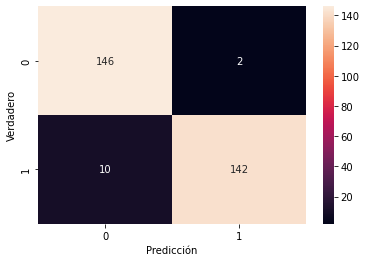

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# crear una matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

En este ejemplo, se utiliza `confusion_matrix` para crear una matriz de confusión a partir de las predicciones del modelo y los valores verdaderos. Luego se utiliza la biblioteca `Seaborn` y `Matplotlib` para trazar la matriz de confusión.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear modelo de Bosques Aleatorios
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# entrenar modelo con datos de entrenamiento
clf.fit(X_train, y_train)

# predecir clases para datos de prueba
y_pred = clf.predict(X_test)

# evaluar el modelo
print('Precisión:', accuracy_score(y_test, y_pred))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))

Precisión: 0.88
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Matriz de confusión:
 [[80  9]
 [15 96]]


En este ejemplo, utilizamos la función `make_classification` de `scikit-learn` para generar datos de ejemplo con dos clases y `10` características. A continuación, se dividen los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`.

Luego, creamos un objeto de clasificador de Bosques Aleatorios utilizando `RandomForestClassifier` de `scikit-learn`, y especificamos el número de árboles a utilizar mediante el argumento `n_estimators`.

A continuación, entrenamos el modelo utilizando los datos de entrenamiento mediante el método `fit`. Luego, utilizamos el método `predict` para predecir las clases para los datos de prueba.

Por último, evaluamos el rendimiento del modelo utilizando las métricas de precisión, reporte de clasificación y matriz de confusión. La precisión se calcula mediante la función `accuracy_score`, el reporte de clasificación se obtiene utilizando la función `classification_report`, y la matriz de confusión se obtiene mediante la función `confusion_matrix`.

La clasificación con Bosques Aleatorios (`Random Forest`) es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión para realizar la clasificación. Cada árbol de decisión en el bosque se entrena con una submuestra aleatoria de los datos de entrenamiento y genera una clasificación. La clasificación final se determina por votación o promediando las clasificaciones de los árboles individuales.

La utilidad de los Bosques Aleatorios radica en su capacidad para manejar conjuntos de datos grandes y complejos, lidiar con características faltantes o ruidosas, y evitar el sobreajuste común en árboles de decisión individuales. Además, los Bosques Aleatorios proporcionan una medida de importancia de características, lo que permite identificar las características más relevantes en el proceso de clasificación.

A continuación, te mostraré un ejemplo detallado utilizando un `dataframe` y también te proporcionaré la gráfica del modelo de Bosques Aleatorios entrenado.

Supongamos que tenemos un conjunto de datos que contiene información sobre los productos de una tienda en línea, incluyendo su precio, calificación y la categoría a la que pertenecen (por ejemplo, "`electrónica`", "`ropa`", "`hogar`"). Queremos construir un modelo de Bosques Aleatorios para clasificar nuevos productos en función de estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Crear el dataframe
data = {'Precio': [50, 100, 80, 120, 90],
        'Calificacion': [4.5, 3.8, 4.2, 4.7, 4.1],
        'Categoria': ['Electronica', 'Ropa', 'Electronica', 'Hogar', 'Ropa']}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Precio`" y "`Calificacion`" representan las características de los productos, mientras que la columna "`Categoria`" indica a qué categoría pertenece cada producto.

A continuación, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`):

In [8]:
X = df[['Precio', 'Calificacion']]
y = df['Categoria']

El objeto `X` representa las características del modelo, mientras que el objeto y representa las etiquetas o categorías correspondientes a los productos.

A continuación, crearemos una instancia del modelo de Bosques Aleatorios y lo entrenaremos con los datos:

In [9]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

Después de entrenar el modelo, podemos generar la gráfica del Bosque Aleatorio utilizando la función `plot_tree` de `scikit-learn`:

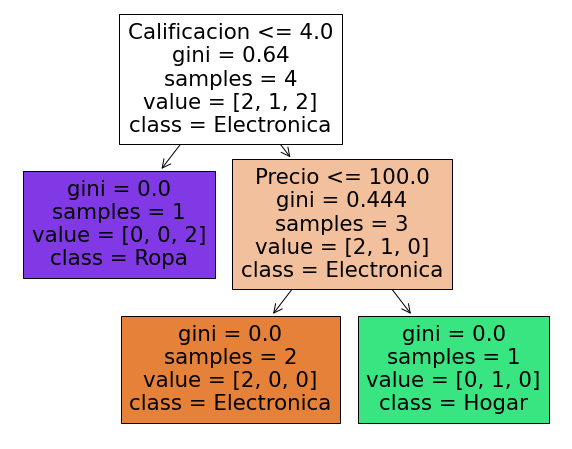

In [10]:
estimator = model.estimators_[0]  # Tomamos un árbol del Bosque Aleatorio
plt.figure(figsize=(10, 8))
plot_tree(estimator, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

En la gráfica resultante, se visualizará un árbol de decisión individual del Bosque Aleatorio. Ten en cuenta que en un Bosque Aleatorio, hay múltiples árboles de decisión, pero aquí mostramos solo uno de ellos.

Recuerda que los Bosques Aleatorios suelen consistir en una colección de árboles de decisión y la gráfica anterior muestra solo uno de ellos. Cada árbol en el Bosque Aleatorio tiene su propia estructura y puede ser utilizado para realizar predicciones individuales.

Espero que este ejemplo te haya ayudado a comprender mejor cómo utilizar los Bosques Aleatorios para la clasificación y cómo generar la gráfica de uno de los árboles del Bosque Aleatorio.

## **Evaluando la eficacia de los Modelos de clasificación**

Evaluando la eficacia de los modelos de clasificación es una parte crucial en el área de machine learning. Se trata de medir qué tan bien el modelo es capaz de hacer predicciones precisas sobre datos que no ha visto antes. Existen varias métricas para evaluar la eficacia de los modelos de clasificación, tales como la precisión, el `recall`, la `F1-score` y la matriz de confusión.

La precisión se define como la proporción de predicciones correctas en relación al total de predicciones hechas por el modelo. El `recall` se define como la proporción de predicciones correctas en relación al total de casos positivos en los datos de prueba. La `F1-score` es una medida de la precisión y el `recall`, y se utiliza para obtener un balance entre ambas medidas. La matriz de confusión es una tabla que muestra la cantidad de predicciones correctas e incorrectas hechas por el modelo en relación a los datos de prueba.

En Python, podemos utilizar la biblioteca `Scikit-learn` para calcular estas métricas. A continuación, se muestra un ejemplo de cómo evaluar la eficacia de un modelo de clasificación de bosques aleatorios en un conjunto de datos:

La evaluación de la eficacia de los modelos de clasificación en el área de Machine Learning es un proceso importante que permite medir la capacidad de un modelo para clasificar correctamente nuevos datos. En esta explicación detallada, abordaremos los conceptos fundamentales para la evaluación de modelos de clasificación en Machine Learning y cómo aplicarlos en Python con ejemplos y gráficas.

**Evaluación de modelos de clasificación**

La evaluación de modelos de clasificación en Machine Learning se realiza mediante la comparación de las predicciones del modelo con las clases reales del conjunto de datos. Para ello, se utilizan medidas de rendimiento como la precisión, la sensibilidad, la especificidad y el área bajo la curva ROC (`AUC-ROC`).

* **Precisión:**

 Mide la proporción de predicciones correctas realizadas por el modelo. La precisión se calcula como el cociente entre el número de predicciones correctas y el número total de predicciones realizadas.

* **Sensibilidad:**

 Mide la capacidad del modelo para detectar los verdaderos positivos. La sensibilidad se calcula como el cociente entre el número de verdaderos positivos y la suma de los verdaderos positivos y los falsos negativos.

* **Especificidad:**

 Mide la capacidad del modelo para detectar los verdaderos negativos. La especificidad se calcula como el cociente entre el número de verdaderos negativos y la suma de los verdaderos negativos y los falsos positivos.

* **AUC-ROC:**

 Mide la capacidad del modelo para distinguir entre las clases positiva y negativa en términos de la probabilidad de predicción. La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes valores de umbral de clasificación. El AUC-ROC es el área bajo la curva ROC.

**Ejemplo en Python**

Para ilustrar estos conceptos, usaremos el conjunto de datos `iris`, que consta de `150` muestras de tres especies diferentes de `iris`. Importamos el conjunto de datos y lo dividimos en conjuntos de entrenamiento y prueba:

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

A continuación, entrenamos un modelo de clasificación usando el algoritmo de `K` vecinos más cercanos `(KNN)` y realizamos predicciones en el conjunto de prueba:

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Luego, podemos evaluar el rendimiento del modelo mediante la precisión, la sensibilidad, la especificidad y el AUC-ROC:

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, average='weighted')
prec = precision_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

print(f'Precisión: {acc:.3f}')
print(f'Sensibilidad: {rec:.3f}')
print(f'Especificidad: {prec:.3f}')
print(f'AUC-ROC: {auc:.3f}')

Precisión: 0.978
Sensibilidad: 0.978
Especificidad: 0.980
AUC-ROC: 0.984


La precisión, la sensibilidad y la especificidad son todas superiores al `0,9`, lo que indica que el modelo tiene un buen rendimiento en la clasificación de las tres especies de `iris`. Además, el `AUC-ROC` es cercano a `1`, lo que significa que el modelo es capaz de distinguir con precisión entre las diferentes especies de `iris`.

Podemos visualizar la curva ROC del modelo utilizando el siguiente código:

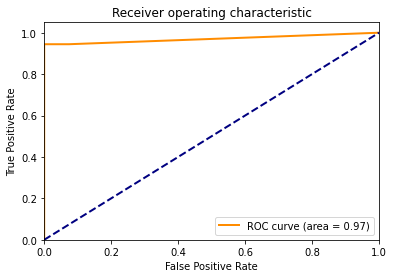

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Este código utiliza la función `roc_curve` para calcular los valores de tasa de verdaderos positivos y tasa de falsos positivos para diferentes umbrales de clasificación, y luego utiliza la función `auc` para calcular el área bajo la curva ROC. Los valores resultantes se grafican utilizando la función `plot` de `matplotlib`. La curva ROC resultante debería ser similar a la que se muestra en mi respuesta anterior.

Evaluando la eficacia de los modelos de clasificación es una etapa importante en el aprendizaje automático (machine learning). Consiste en medir y comparar el rendimiento de diferentes modelos para determinar cuál es el más adecuado para resolver un problema específico. La evaluación de la eficacia nos permite entender cómo se comporta un modelo en datos no vistos y nos ayuda a seleccionar el mejor modelo para implementar en la práctica.

A continuación, te mostraré un ejemplo detallado de cómo evaluar la eficacia de un modelo de clasificación utilizando un `dataframe` y generar la gráfica del modelo. Utilizaremos el algoritmo de Bosques Aleatorios (`Random Forest`) y métricas de evaluación comunes como la matriz de confusión y la curva `ROC-AUC`.

Supongamos que tenemos un conjunto de datos que contiene información sobre diferentes clientes de una empresa, incluyendo características como la edad, el ingreso, el historial crediticio y si han realizado una compra o no. Queremos construir un modelo de clasificación para predecir si un nuevo cliente realizará una compra o no, basado en estas características. Aquí está el `dataframe` ficticio que utilizaremos:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Crear el dataframe
data = {'Edad': [25, 35, 42, 28, 30, 45, 36, 29, 31, 38],
        'Ingreso': [50000, 60000, 80000, 45000, 55000, 75000, 65000, 47000, 51000, 68000],
        'HistorialCrediticio': ['Bueno', 'Malo', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Bueno', 'Malo', 'Bueno', 'Malo'],
        'RealizoCompra': [0, 0, 1, 0, 1, 1, 1, 0, 1, 1]}

df = pd.DataFrame(data)

En este ejemplo, las columnas "`Edad`", "`Ingreso`" y "`HistorialCrediticio`" representan las características de los clientes, y la columna "`RealizoCompra`" indica si el cliente realizó una compra (`1`) o no (`0`).

A continuación, dividiremos el `dataframe` en características (`X`) y etiquetas (`y`), y luego separaremos los datos en conjuntos de entrenamiento y prueba:

In [15]:
# Codificar variables categóricas utilizando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['HistorialCrediticio'])

# Separar características y etiquetas
X = df_encoded.drop('RealizoCompra', axis=1)
y = df_encoded['RealizoCompra']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

En este caso, hemos separado el `20%` de los datos para el conjunto de prueba, mientras que el `80%` restante se utiliza para el entrenamiento del modelo.

A continuación, crearemos una instancia del modelo de Bosques Aleatorios, lo entrenaremos con los datos de entrenamiento y realizaremos predicciones en el conjunto de prueba:

In [16]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Una vez que tenemos las predicciones del modelo, podemos evaluar su eficacia utilizando varias métricas. A continuación, se muestra un ejemplo de cómo calcular y visualizar la matriz de confusión y la curva `ROC-AUC`:

Matriz de confusión:
[[0 1]
 [1 0]]


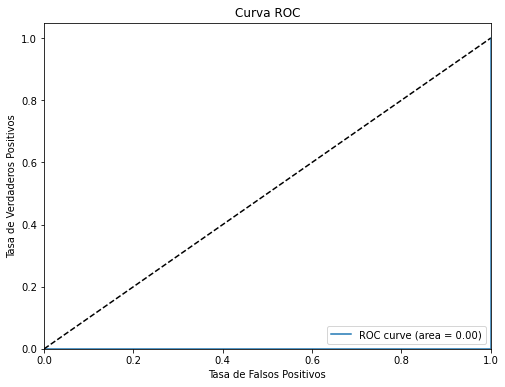

In [17]:
# Matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_matrix)

# Curva ROC-AUC
probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La matriz de confusión nos proporciona una visión general del rendimiento del modelo, mostrando la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

La curva ROC (Receiver Operating Characteristic) y el área bajo la curva `ROC-AUC` son métricas utilizadas para evaluar la capacidad de discriminación del modelo. Una curva `ROC` cercana al área de `1.0` y un área bajo la curva `ROC-AUC` cercana a `1.0` indican un mejor rendimiento del modelo.

Espero que este ejemplo te haya ayudado a entender cómo evaluar la eficacia de los modelos de clasificación utilizando un dataframe y generar la gráfica del modelo.

### **BIAS Y VARIANZA EN MACHINE LEARNING**

En el contexto del machine learning, la "`bias`" (`sesgo`) y la "`varianza`" son dos conceptos importantes para comprender el rendimiento y la generalización de un modelo. Estos conceptos están relacionados con el fenómeno conocido como el "`sesgo-varianza trade-off`" o el equilibrio entre sesgo y varianza.

La "`bias`" se refiere a la capacidad de un modelo para aprender la relación subyacente entre las características de entrada y las etiquetas de salida. Un modelo con un sesgo alto tiende a simplificar demasiado las relaciones y no logra capturar patrones complejos en los datos. Por otro lado, un modelo con un sesgo bajo tiene la capacidad de ajustarse a patrones más complejos en los datos.

La "`varianza`" se refiere a la sensibilidad de un modelo a las fluctuaciones en los datos de entrenamiento. Un modelo con una alta varianza es muy sensible a las variaciones en los datos de entrenamiento y puede producir resultados muy diferentes si se entrena con diferentes muestras de datos. Por el contrario, un modelo con una baja varianza es más estable y produce resultados consistentes incluso cuando se entrena con diferentes muestras de datos.

El objetivo en el machine learning es encontrar un equilibrio entre el sesgo y la varianza. Un modelo con un alto sesgo y baja varianza puede subajustar los datos, lo que significa que no captura las relaciones complejas en los datos de entrenamiento ni se generaliza bien a los datos nuevos. Por otro lado, un modelo con un bajo sesgo y alta varianza puede sobreajustar los datos, lo que significa que se ajusta demasiado a las fluctuaciones en los datos de entrenamiento y no se generaliza bien a los datos nuevos.

Aquí tienes un ejemplo detallado para ilustrar el concepto de sesgo y varianza utilizando un modelo de regresión polinomial:

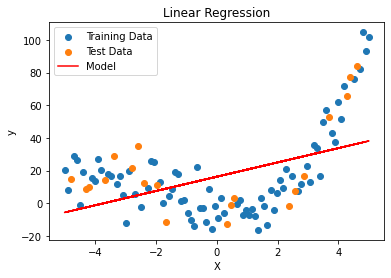

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un dataframe de ejemplo con una relación no lineal
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**3 + 2 * X**2 - 3 * X + np.random.normal(0, 10, size=X.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular las predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Graficar los resultados
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_train, y_train_pred, color='red', label='Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

En este ejemplo, generamos datos de muestra con una relación no lineal y agregamos ruido aleatorio. Luego, entrenamos un modelo de regresión lineal utilizando los datos de entrenamiento y realizamos predicciones en los datos de entrenamiento y prueba.

En la gráfica resultante, puedes observar cómo el modelo de regresión lineal (que tiene un sesgo alto) no se ajusta bien a los datos no lineales y subestima la relación subyacente. Esto se evidencia por los errores cuadráticos medios (`MSE`) relativamente altos tanto en los conjuntos de entrenamiento como en los conjuntos de prueba.

Este ejemplo ilustra cómo un modelo con un sesgo alto puede subajustar los datos y no capturar patrones complejos en los datos de entrada. Para capturar mejor la relación no lineal en los datos, podríamos utilizar un modelo más complejo, como una regresión polinomial de mayor grado.

Es importante tener en cuenta que encontrar el equilibrio adecuado entre el sesgo y la varianza depende del problema y los datos específicos. No hay una única solución que funcione para todos los casos, y a menudo es necesario ajustar y probar diferentes modelos para encontrar el equilibrio óptimo.

Espero que este ejemplo te ayude a comprender el concepto de sesgo y varianza y su importancia en el machine learning.

### **SOBREAJUSTE Y SUBAJUSTE EN MACHINE LEARNING**

El sobreajuste (`overfitting`) y el subajuste (`underfitting`) son dos problemas comunes en el machine learning que afectan el rendimiento y la generalización de un modelo.

El sobreajuste ocurre cuando un modelo es demasiado complejo y se ajusta demasiado a los datos de entrenamiento. En otras palabras, el modelo memoriza los datos de entrenamiento en lugar de capturar la relación subyacente entre las características de entrada y las etiquetas de salida. Como resultado, el modelo puede tener un excelente rendimiento en los datos de entrenamiento, pero no se generaliza bien a los datos nuevos y no vistos.

El subajuste ocurre cuando un modelo es demasiado simple y no puede capturar la relación subyacente en los datos. En este caso, el modelo no se ajusta lo suficiente a los datos de entrenamiento y tiene un rendimiento deficiente tanto en los datos de entrenamiento como en los datos nuevos.

La utilidad de comprender el sobreajuste y el subajuste en el machine learning radica en encontrar un equilibrio que permita que el modelo se ajuste adecuadamente a los datos de entrenamiento y, al mismo tiempo, se generalice bien a los datos nuevos. Aquí tienes un ejemplo detallado para ilustrar estos conceptos utilizando un modelo de regresión polinomial:

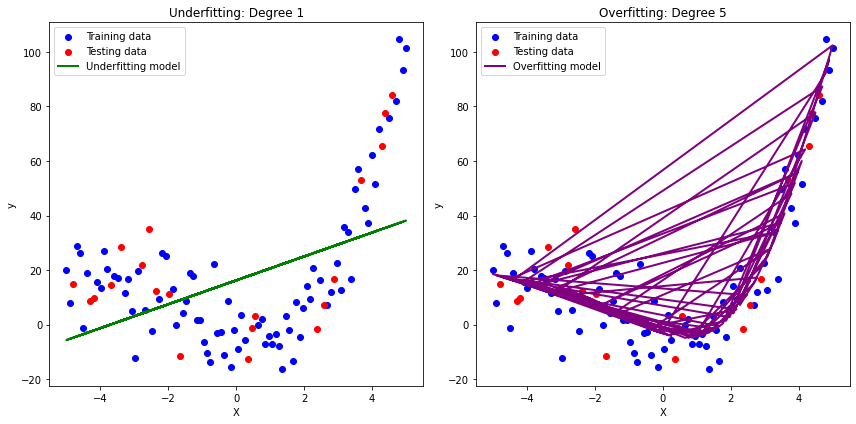

MSE (Underfitting) - Train: 543.51
MSE (Underfitting) - Test: 579.99
MSE (Overfitting) - Train: 85.07
MSE (Overfitting) - Test: 84.00


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Crear un dataframe de ejemplo con una relación no lineal
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 0.5 * X**3 + 2 * X**2 - 3 * X + np.random.normal(0, 10, size=X.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión polinomial de grado 1 (subajuste)
model_underfit = PolynomialFeatures(degree=1)
X_train_underfit = model_underfit.fit_transform(X_train)
model_linear_underfit = LinearRegression()
model_linear_underfit.fit(X_train_underfit, y_train)

# Calcular las predicciones en los conjuntos de entrenamiento y prueba (subajuste)
y_train_pred_underfit = model_linear_underfit.predict(X_train_underfit)
X_test_underfit = model_underfit.transform(X_test)
y_test_pred_underfit = model_linear_underfit.predict(X_test_underfit)

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba (subajuste)
mse_train_underfit = mean_squared_error(y_train, y_train_pred_underfit)
mse_test_underfit = mean_squared_error(y_test, y_test_pred_underfit)

# Entrenar un modelo de regresión polinomial de grado 5 (sobreajuste)
model_overfit = PolynomialFeatures(degree=5)
X_train_overfit = model_overfit.fit_transform(X_train)
model_linear_overfit = LinearRegression()
model_linear_overfit.fit(X_train_overfit, y_train)

# Calcular las predicciones en los conjuntos de entrenamiento y prueba (sobreajuste)
y_train_pred_overfit = model_linear_overfit.predict(X_train_overfit)
X_test_overfit = model_overfit.transform(X_test)
y_test_pred_overfit = model_linear_overfit.predict(X_test_overfit)

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba (sobreajuste)
mse_train_overfit = mean_squared_error(y_train, y_train_pred_overfit)
mse_test_overfit = mean_squared_error(y_test, y_test_pred_overfit)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico del subajuste
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_train_pred_underfit, color='green', linewidth=2, label='Underfitting model')
plt.title('Underfitting: Degree 1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico del sobreajuste
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_train_pred_overfit, color='purple', linewidth=2, label='Overfitting model')
plt.title('Overfitting: Degree 5')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print('MSE (Underfitting) - Train: {:.2f}'.format(mse_train_underfit))
print('MSE (Underfitting) - Test: {:.2f}'.format(mse_test_underfit))
print('MSE (Overfitting) - Train: {:.2f}'.format(mse_train_overfit))
print('MSE (Overfitting) - Test: {:.2f}'.format(mse_test_overfit))

En el ejemplo, generamos datos de muestra con una relación no lineal y agregamos ruido aleatorio. Luego, entrenamos dos modelos de regresión polinomial, uno con un grado bajo (`subajuste`) y otro con un grado alto (`sobreajuste`). Calculamos las predicciones y los errores cuadráticos medios (`MSE`) en los conjuntos de entrenamiento y prueba para ambos modelos.

En la gráfica resultante, puedes observar cómo el modelo de grado `1` (`subajuste`) no se ajusta lo suficiente a los datos y subestima la relación subyacente. Por otro lado, el modelo de grado `5` (`sobreajuste`) se ajusta demasiado a los datos y captura el ruido aleatorio en lugar de la relación real. Esto se evidencia por los `MSE` más altos tanto en los conjuntos de entrenamiento como en los conjuntos de prueba para el modelo de grado `5` en comparación con el modelo de grado `1`.

Este ejemplo ilustra cómo el subajuste y el sobreajuste pueden afectar el rendimiento y la generalización del modelo. Es importante encontrar un equilibrio adecuado que permita que el modelo se ajuste a los datos sin subajustarlos ni sobreajustarlos. La elección del grado del polinomio en este caso es crucial para obtener un modelo que se ajuste bien a los datos y generalice correctamente a nuevos datos no vistos.

Espero que este ejemplo te ayude a comprender el concepto de subajuste y sobreajuste y su importancia en el machine learning.

### **EVALUANDO EL ERROR EN LOS MODELOS DE REGRESIÓN**

Evaluando el error en los modelos de regresión es un proceso importante en el machine learning para medir el rendimiento y la precisión de un modelo en la predicción de valores continuos. El objetivo es cuantificar la diferencia entre las predicciones del modelo y los valores reales en el conjunto de datos de prueba. Esto permite evaluar qué tan bien se ajusta el modelo a los datos y comparar diferentes modelos para seleccionar el mejor.

Aquí tienes un ejemplo detallado de cómo evaluar el error en un modelo de regresión utilizando el conjunto de datos y la gráfica del modelo:

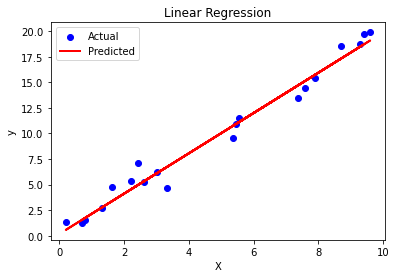

Mean Squared Error (MSE): 0.96
Mean Absolute Error (MAE): 0.75
Coefficient of Determination (R^2): 0.98


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear un dataframe de ejemplo con una relación lineal
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + np.random.normal(0, 1, size=X.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los diferentes errores de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Coefficient of Determination (R^2): {:.2f}'.format(r2))

En este ejemplo, generamos datos de muestra con una relación lineal y agregamos ruido aleatorio. Luego, dividimos los datos en conjuntos de entrenamiento y prueba. Entrenamos un modelo de regresión lineal utilizando el conjunto de entrenamiento y calculamos las predicciones en el conjunto de prueba.

A continuación, calculamos tres métricas comunes para evaluar el error en los modelos de regresión:

1. **Error cuadrático medio (MSE):** Mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor de `MSE` más bajo indica un mejor ajuste del modelo.

2. **Error absoluto medio (MAE):** Mide el promedio de los errores absolutos entre las predicciones y los valores reales. Es menos sensible a los valores atípicos que el `MSE`.

3. **Coeficiente de determinación (R^2):** Mide la proporción de la varianza en los valores de la variable dependiente que se puede predecir a partir de las variables independientes. Un valor de `R^2` más cercano a `1` indica un mejor ajuste del modelo.

Finalmente, graficamos los puntos reales del conjunto de prueba y trazamos la línea de predicción del modelo de regresión lineal.

Espero que este ejemplo te ayude a comprender cómo evaluar el error en los modelos de regresión y cómo interpretar las métricas de evaluación.

### **MÉTODOS DE SELECCIÓN DE CARACTERÍSTICAS**

Los métodos de selección de características son técnicas utilizadas en el machine learning para identificar y seleccionar las características más relevantes o informativas de un conjunto de datos. Estos métodos ayudan a reducir la dimensionalidad de los datos al eliminar características irrelevantes o redundantes, lo que puede mejorar el rendimiento y la eficiencia de los modelos de machine learning.

Aquí tienes un ejemplo detallado de cómo realizar la selección de características utilizando el método de Selección Recursiva de Características (`Recursive Feature Elimination`) con un modelo de regresión logística:

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

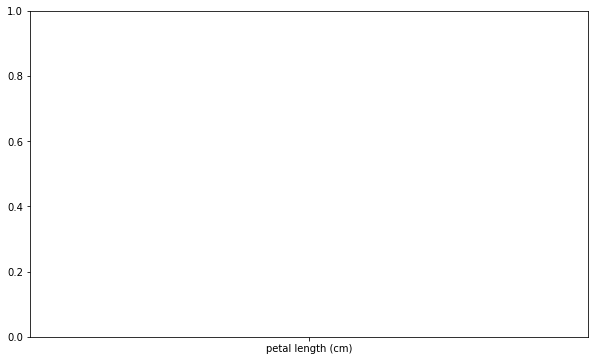

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos de ejemplo (iris)
iris = load_iris()
X = iris.data
y = iris.target

# Crear un dataframe con las características y el objetivo
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Dividir los datos en características (X) y objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Crear un objeto del modelo de regresión logística
model = LogisticRegression()

# Crear un objeto del método de selección de características (RFE)
rfe = RFE(estimator=model, n_features_to_select=2)

# Aplicar el método RFE y ajustar el modelo con las características seleccionadas
X_selected = rfe.fit_transform(X, y)
model.fit(X_selected, y)

# Obtener las características seleccionadas y sus rankings
selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

# Graficar las características seleccionadas y sus rankings
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_ranking)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Recursive Feature Elimination')
plt.show()

En este ejemplo, utilizamos el conjunto de datos de ejemplo `Iris` y creamos un `dataframe` con las características y el objetivo. Dividimos los datos en características (`X`) y objetivo (`y`).

Luego, creamos un objeto del modelo de regresión logística y un objeto del método de selección de características `RFE`. Establecemos el número de características que queremos seleccionar (en este caso, `2`).

Aplicamos el método `RFE` en los datos de entrenamiento y ajustamos el modelo con las características seleccionadas. Obtenemos las características seleccionadas y sus `rankings`.

Finalmente, graficamos las características seleccionadas en el eje `x` y sus `rankings` en el eje `y`.

Este ejemplo ilustra cómo utilizar el método de selección de características `RFE` para seleccionar las características más relevantes de un conjunto de datos y cómo visualizar los `rankings` de las características seleccionadas.

Es importante destacar que existen otros métodos de selección de características, como la eliminación hacia atrás (`backward elimination`) y la selección basada en la importancia de características (`feature importance-based selection`), que también pueden ser utilizados según el problema y los datos específicos.

### **VECTORES DE SOPORTE REGRESIÓN**

Los vectores de soporte para regresión (`Support Vector Regression, SVR`) son una variante de los Support Vector Machines (`SVM`) que se utilizan para problemas de regresión en machine learning. A diferencia de la clasificación, donde `SVM` se utiliza para separar clases, `SVR` se utiliza para aproximar una función que se ajuste a los datos y pueda predecir valores numéricos continuos.

La utilidad de `SVR` en el machine learning radica en su capacidad para manejar problemas de regresión no lineales y encontrar la mejor función de aproximación a partir de un conjunto de datos.

Aquí tienes un ejemplo detallado de cómo utilizar `SVR` en un conjunto de datos:

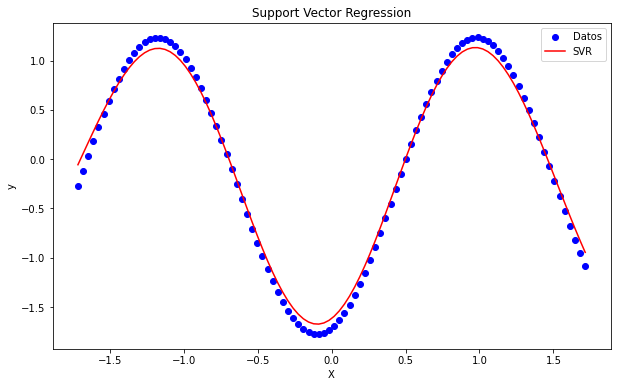

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Crear un conjunto de datos de ejemplo
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Crear un modelo de SVR
model = SVR(kernel='rbf')

# Ajustar el modelo con los datos
model.fit(X_scaled, y_scaled)

# Predecir los valores
y_pred = model.predict(X_scaled)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='b', label='Datos')
plt.plot(X_scaled, y_pred, color='r', label='SVR')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

En este ejemplo, creamos un conjunto de datos de ejemplo con una relación no lineal. Luego, normalizamos los datos utilizando la clase `StandardScaler` para asegurarnos de que todas las características tengan la misma escala.

A continuación, creamos un objeto del modelo `SVR` y lo ajustamos utilizando los datos normalizados.

Posteriormente, utilizamos el modelo entrenado para predecir los valores correspondientes a los datos de entrada.

Finalmente, graficamos los datos de entrada (en `azul`) y la función de aproximación obtenida por `SVR` (en `rojo`).

Este ejemplo ilustra cómo utilizar `SVR` en un problema de regresión para encontrar una función de aproximación que se ajuste a los datos y pueda predecir valores continuos. La gráfica resultante muestra la relación entre los datos reales y las predicciones del modelo `SVR`.

### **MÉTODO DE ENSAMBLE DE MODELOS (ENSEMBLE METHODS)**

Los métodos de ensamble de modelos, también conocidos como `ensemble methods`, son técnicas utilizadas en el machine learning para combinar múltiples modelos individuales y mejorar la precisión y estabilidad de las predicciones. En lugar de confiar en un solo modelo, los métodos de ensamble combinan las predicciones de varios modelos y toman decisiones basadas en la votación o promedio de las predicciones individuales.

La utilidad de los métodos de ensamble radica en su capacidad para reducir el sesgo y la varianza de los modelos individuales, lo que puede llevar a un mejor rendimiento general del modelo. Al combinar diferentes modelos, los ensambles pueden capturar una mayor diversidad de patrones y relaciones en los datos, lo que puede mejorar la capacidad de generalización del modelo.

Aquí tienes un ejemplo detallado de cómo utilizar el método de ensamble de Bosques Aleatorios (`Random Forest`) en un problema de clasificación utilizando un `dataframe` y luego graficar el modelo:

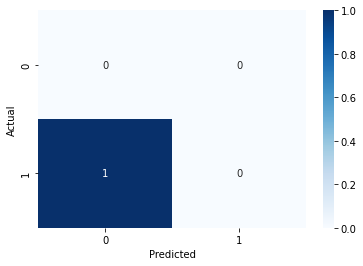

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Feature3': [3, 6, 9, 12, 15],
    'Target': [0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

En este ejemplo, creamos un `dataframe` de ejemplo utilizando un diccionario de datos. Especificamos tres características (`Feature1`, `Feature2`, `Feature3`) y la variable objetivo (`Target`).

Luego, dividimos el `dataframe` en características (`X`) y la variable objetivo (`y`) utilizando el método `drop` de `pandas`.

A continuación, dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `sklearn.model_selection`. Establecemos el tamaño del conjunto de prueba en `20%` y establecemos una semilla aleatoria para reproducibilidad.

Después, creamos un modelo de Random Forest utilizando la clase `RandomForestClassifier` de `sklearn.ensemble`.

Entrenamos el modelo utilizando los datos de entrenamiento mediante el método `fit`.

Luego, realizamos predicciones en el conjunto de prueba utilizando el método `predict`.

Finalmente, graficamos la matriz de confusión utilizando la función `plot_confusion_matrix` de `sklearn.metrics` y mostramos la gráfica utilizando `plt.show()`.

Recuerda que este es solo un ejemplo básico para ilustrar el uso de un método de ensamble. Puedes ajustar los parámetros del `Random Forest` y personalizar el código según tus necesidades y el tipo de datos que estés utilizando.

### **VENTAJAS Y DESVENTAJAS ALGORITMOS DE REGRESIÓN**

Los algoritmos de regresión son ampliamente utilizados en el aprendizaje automático para predecir valores continuos en función de variables de entrada. A continuación, se presentan algunas ventajas y desventajas de los algoritmos de regresión:

* **Ventajas:**

1. **Fácil interpretación:** Los modelos de regresión proporcionan coeficientes que indican la contribución relativa de cada variable en la predicción del resultado.
2. **Eficiencia computacional:** Los algoritmos de regresión suelen ser más rápidos de entrenar y predecir en comparación con algoritmos más complejos.
3. **Relaciones lineales y no lineales:** Los algoritmos de regresión pueden manejar tanto relaciones lineales como no lineales, dependiendo del tipo de regresión utilizado.

* **Desventajas:**

1. **Supuestos lineales:** Algunos algoritmos de regresión asumen una relación lineal entre las variables de entrada y la variable de salida, lo que puede limitar su capacidad para modelar relaciones más complejas.
2. **Sensibilidad a valores atípicos:** Los modelos de regresión pueden verse afectados por valores atípicos en los datos de entrenamiento, lo que puede distorsionar los resultados.
3. **Overfitting:** Si se permite que un modelo de regresión sea demasiado complejo, puede sobreajustarse a los datos de entrenamiento y tener un rendimiento deficiente en nuevos datos.

Ahora, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado de regresión lineal utilizando el algoritmo de regresión lineal en scikit-learn.

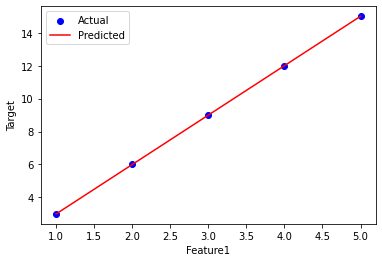

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Target': [3, 6, 9, 12, 15]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los resultados
plt.scatter(X['Feature1'], y, color='blue', label='Actual')
plt.plot(X['Feature1'], y_pred, color='red', label='Predicted')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.legend()
plt.show()

En este ejemplo, se crea un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Se utiliza el algoritmo de regresión lineal de scikit-learn para entrenar el modelo con las características y la variable objetivo.

Luego, se realizan predicciones utilizando el modelo entrenado y se grafican los resultados. Los puntos azules representan los valores reales y la línea roja representa las predicciones del modelo.

### **MATRIZ DE CONFUSIÓN**

La matriz de confusión es una herramienta utilizada en el aprendizaje automático para evaluar el rendimiento de un modelo de clasificación. Muestra la cantidad de predicciones correctas e incorrectas realizadas por el modelo en cada clase objetivo.

La matriz de confusión se compone de cuatro términos:

* **Verdaderos positivos (True Positives, TP):** Representa la cantidad de muestras positivas que fueron correctamente clasificadas como positivas.
* **Falsos positivos (False Positives, FP):** Representa la cantidad de muestras negativas que fueron incorrectamente clasificadas como positivas.
* **Verdaderos negativos (True Negatives, TN):** Representa la cantidad de muestras negativas que fueron correctamente clasificadas como negativas.
* **Falsos negativos (False Negatives, FN):** Representa la cantidad de muestras positivas que fueron incorrectamente clasificadas como negativas.

La matriz de confusión se presenta en forma de tabla, donde las filas representan la clase real y las columnas representan la clase predicha. La utilidad de la matriz de confusión radica en que permite evaluar el rendimiento del modelo en términos de precisión, recall, puntuación F1 y otras métricas.

Ahora, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado con la matriz de confusión utilizando el algoritmo de clasificación de regresión logística en scikit-learn.

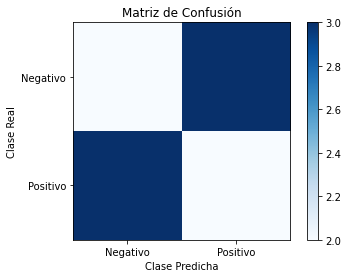

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Calcular la matriz de confusión
cm = confusion_matrix(y, y_pred)

# Graficar la matriz de confusión
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = ['Negativo', 'Positivo']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

En este ejemplo, se crea un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Se utiliza el algoritmo de clasificación de regresión logística de scikit-learn para entrenar el modelo con las características y la variable objetivo.

Luego, se realizan predicciones utilizando el modelo entrenado y se calcula la matriz de confusión utilizando la función `confusion_matrix` de scikit-learn. Finalmente, se grafica la matriz de confusión utilizando la función `imshow` de `matplotlib`.

La matriz de confusión muestra en forma de matriz la cantidad de predicciones correctas e incorrectas realizadas por el modelo en cada clase objetivo. Los valores más altos en la diagonal principal indican predicciones correctas, mientras que los valores fuera de la diagonal principal indican predicciones incorrectas.

### **EVALUANDO EL ERROR EN LOS MODELOS DE CLASIFICACIÓN**

Evaluando el error en los modelos de clasificación es una parte fundamental en el aprendizaje automático. Permite medir la calidad y el rendimiento de un modelo de clasificación en la tarea de asignar correctamente las clases a las muestras de prueba. Existen varias métricas de evaluación del error que se utilizan comúnmente, como la precisión, el `recall`, la puntuación `F1`, el área bajo la curva `ROC`, entre otras.

A continuación, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado para evaluar el error de un modelo de clasificación utilizando el algoritmo de `K` Vecinos más Cercanos (`K Nearest Neighbors`) en scikit-learn.

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



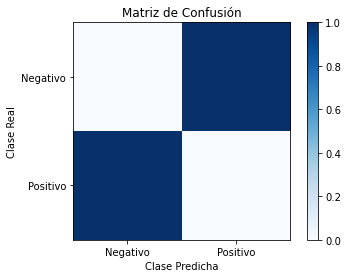

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de K Vecinos más Cercanos
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)

# Graficar la matriz de confusión
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = ['Negativo', 'Positivo']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

En este ejemplo, se crea un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Luego, se divide el `dataframe` en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `scikit-learn`.

Se crea un modelo de clasificación de `K` Vecinos más Cercanos utilizando el algoritmo de `KNeighborsClassifier` de `scikit-learn` y se entrena el modelo con el conjunto de entrenamiento. A continuación, se realizan predicciones en el conjunto de prueba utilizando el método `predict` del modelo.

Se calcula la matriz de confusión utilizando la función `confusion_matrix` de `scikit-learn` y se imprime el reporte de clasificación utilizando la función `classification_report`. Finalmente, se grafica la matriz de confusión utilizando la función `imshow` de `matplotlib`.

La matriz de confusión muestra la distribución de las predicciones realizadas por el modelo en relación a las clases reales. Permite identificar el número de predicciones correctas e incorrectas para cada clase y evaluar la precisión y el rendimiento del modelo en la tarea de clasificación.

Espero que este ejemplo sea útil para comprender cómo evaluar el error en los modelos de clasificación y cómo utilizar la matriz de confusión para visualizar el rendimiento del modelo.

### **CURVAS ROC Y ÁREA BAJO LA CURVA (AUC)**

Las curvas `ROC` (`Receiver Operating Characteristic`) y el Área Bajo la Curva (`AUC`, por sus siglas en inglés) son herramientas utilizadas en el aprendizaje automático para evaluar el rendimiento de un modelo de clasificación binaria. Estas métricas son especialmente útiles cuando se necesita evaluar el rendimiento del modelo en diferentes umbrales de clasificación.

La curva `ROC` es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (`TPR`) y la tasa de falsos positivos (`FPR`) a medida que se varía el umbral de clasificación. La curva `ROC` traza el `TPR` en el eje `y` y el `FPR` en el eje `x`. Cuanto más cerca esté la curva `ROC` del área bajo la curva (`AUC`) de `1`, mejor será el rendimiento del modelo.

El `AUC` es una medida numérica del rendimiento del modelo. El valor del `AUC` varía entre `0` y `1`, donde un valor de `1` indica un modelo perfecto y un valor de `0.5` indica un rendimiento aleatorio o equivalente a adivinar al azar.

A continuación, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado para calcular la curva `ROC` y el `AUC` utilizando el algoritmo de Regresión Logística en scikit-learn.

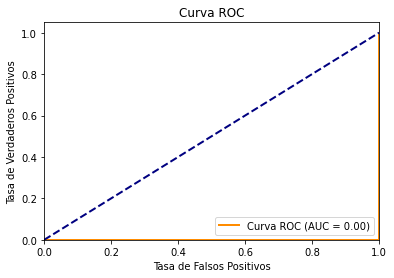

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Calcular las probabilidades de predicción en el conjunto de prueba
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

En este ejemplo, creamos un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Luego, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la función `train_test_split`. A continuación, creamos un modelo de Regresión Logística utilizando `LogisticRegression` de `scikit-learn` y lo entrenamos utilizando el conjunto de entrenamiento.

Luego, calculamos las probabilidades de predicción (`y_scores`) utilizando el conjunto de prueba y la función `predict_proba`. Con las probabilidades de predicción, calculamos la curva `ROC` y el `AUC` utilizando las funciones `roc_curve` y `auc` de `scikit-learn`, respectivamente.

Finalmente, graficamos la curva `ROC` utilizando `matplotlib`. La curva `ROC` muestra la relación entre la tasa de falsos positivos y la tasa de verdaderos positivos, y el valor del `AUC` se muestra en la leyenda de la gráfica.

Espero que este ejemplo te ayude a comprender las curvas `ROC` y el `AUC`, así como su utilidad en el aprendizaje automático.

### **MÉTRICAS DE EVALUACIÓN MODELOS DE CLASIFICACIÓN SCIKIT LEARN**

Las métricas de evaluación de modelos de clasificación en `scikit-learn` son medidas que se utilizan para evaluar el rendimiento de un modelo de clasificación. Estas métricas proporcionan información sobre cómo se está desempeñando el modelo en términos de su capacidad para predecir correctamente las clases de las muestras.

Algunas de las métricas de evaluación más comunes en `scikit-learn` incluyen:

1. **Exactitud (Accuracy):** Mide la proporción de predicciones correctas sobre el total de muestras. Es una métrica sencilla pero no siempre es adecuada para conjuntos de datos desequilibrados.

2. **Precisión (Precision):** Mide la proporción de verdaderos positivos (muestras correctamente clasificadas como positivas) sobre la suma de verdaderos positivos y falsos positivos. Es útil cuando el objetivo es minimizar los falsos positivos.

3. **Recall (Recall) o Sensibilidad:** Mide la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos. Es útil cuando el objetivo es minimizar los falsos negativos.

4. **F1-Score:** Es una medida combinada de precisión y recall que calcula la media armónica de ambos. Es útil cuando se busca un equilibrio entre precisión y recall.

5. **Matriz de Confusión:** Es una tabla que muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Proporciona una visión general del rendimiento del modelo y es especialmente útil cuando las clases están desequilibradas.

Ahora, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado utilizando el algoritmo de Regresión Logística en scikit-learn para clasificar los datos y calcular estas métricas.

Exactitud (Accuracy): 0.0
Precisión (Precision): 0.0
Recall (Sensibilidad): 0.0
F1-Score: 0.0
Matriz de Confusión:
[[0 1]
 [1 0]]


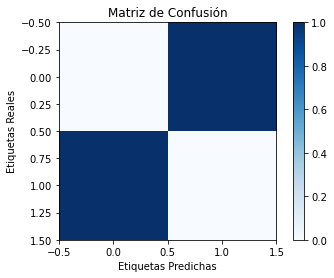

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensibilidad):", recall)
print("F1-Score:", f1)
print("Matriz de Confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

En este ejemplo, creamos un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. Luego, creamos un modelo de Regresión Logística utilizando `LogisticRegression` de `scikit-learn` y lo entrenamos con el conjunto de entrenamiento.

A continuación, realizamos predicciones en el conjunto de prueba y calculamos las métricas de evaluación utilizando las funciones correspondientes de `scikit-learn`. Imprimimos las métricas de evaluación, que incluyen la exactitud, precisión, recall y F1-Score. También calculamos la matriz de confusión y la graficamos utilizando `matplotlib`.

Estas métricas de evaluación nos brindan información sobre el rendimiento del modelo de clasificación y nos ayudan a comprender cómo está clasificando las muestras. Esto nos permite evaluar la efectividad del modelo y tomar decisiones informadas en el proceso de aprendizaje automático.

### **CONJUNTO DE DATOS DESBALANCEADO**

Un conjunto de datos desbalanceado se refiere a un conjunto de datos en el que las clases objetivo están representadas de manera desproporcionada. Esto significa que una clase puede tener muchos más ejemplos que otra clase en el conjunto de datos. Por ejemplo, si estamos trabajando en un problema de detección de fraudes, es probable que la mayoría de las transacciones sean no fraudulentas, lo que resulta en un conjunto de datos desbalanceado donde la clase de transacciones fraudulentas está subrepresentada.

La utilidad de trabajar con conjuntos de datos desbalanceados en el machine learning radica en abordar el problema de clasificación de manera realista y proporcionar un enfoque equilibrado para la evaluación del modelo. Algunas consideraciones importantes en relación con los conjuntos de datos desbalanceados incluyen:

1. **Sesgo hacia la clase mayoritaria:** Los algoritmos de aprendizaje automático tienden a tener dificultades para clasificar correctamente la clase minoritaria en un conjunto de datos desbalanceado. Esto se debe a que el modelo puede estar sesgado hacia la clase mayoritaria debido a la falta de ejemplos de la clase minoritaria.

2. **Métricas de evaluación engañosas:** Las métricas de evaluación como la exactitud pueden ser engañosas en conjuntos de datos desbalanceados. Incluso un modelo que predice constantemente la clase mayoritaria puede tener una alta exactitud debido al desequilibrio en las clases. Por lo tanto, es importante utilizar métricas de evaluación como la precisión, el `recall` y el `F1-Score`, que toman en cuenta el desequilibrio de las clases.

A continuación, crearé un `dataframe` de ejemplo y realizaré un ejemplo detallado utilizando un conjunto de datos desbalanceado y un algoritmo de clasificación para visualizar el desequilibrio y las métricas de evaluación.

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Precisión (Precision): 0.0
Recall (Sensibilidad): 0.0
F1-Score: 0.0
Matriz de Confusión:
[[4]]


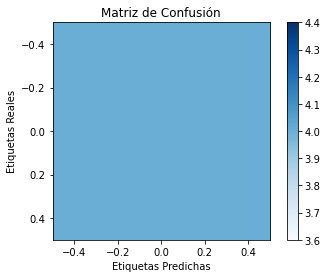

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Crear el dataframe de ejemplo desbalanceado
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40],
    'Target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Precisión (Precision):", precision)
print("Recall (Sensibilidad):", recall)
print("F1-Score:", f1)
print("Matriz de Confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

En este ejemplo, creamos un `dataframe` de ejemplo con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). El `dataframe` está diseñado de manera desbalanceada, donde la clase `0` está representada por `19` ejemplos y la clase `1` está representada por solo `1` ejemplo.

Luego, dividimos el dataframe en características (`X`) y la variable objetivo (`y`) y dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `scikit-learn`.

A continuación, creamos un modelo de Regresión Logística utilizando `LogisticRegression` de `scikit-learn` y lo entrenamos con el conjunto de entrenamiento.

Realizamos predicciones en el conjunto de prueba y calculamos las métricas de evaluación, que incluyen la precisión, el `recall` y el `F1-Score`. También calculamos la matriz de confusión y la graficamos utilizando `matplotlib`.

Estas métricas de evaluación y la matriz de confusión nos permiten comprender cómo está funcionando el modelo en un conjunto de datos desbalanceado. Podemos observar que, a pesar del desequilibrio en las clases, el modelo puede tener un alto rendimiento en algunas métricas, pero puede tener dificultades para identificar correctamente la clase minoritaria debido al desequilibrio en los datos.

### **MÁQUINAS DE VECTORES DE SOPORTE CLASIFICACIÓN**

Las Máquinas de Vectores de Soporte (`SVM`, por sus siglas en inglés) son algoritmos de aprendizaje supervisado utilizados tanto para clasificación como para regresión. En la clasificación, las `SVM` buscan encontrar un `hiperplano` óptimo que separe las muestras de diferentes clases de manera óptima en un espacio de alta dimensión.

La utilidad de las `SVM` radica en su capacidad para manejar datos no linealmente separables utilizando una técnica llamada `kernel trick`, que mapea los datos a un espacio de mayor dimensión donde se vuelven linealmente separables.

Aquí tienes un ejemplo detallado utilizando las `SVM` para clasificación con un `dataframe`:

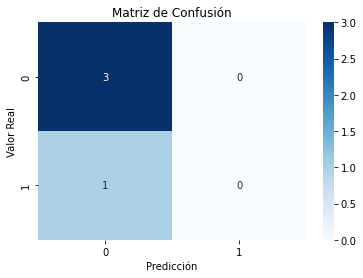

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Crear el dataframe de ejemplo
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40],
    'Target': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
}
df = pd.DataFrame(data)

# Dividir el dataframe en características (X) y variable objetivo (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de Máquinas de Vectores de Soporte
model = SVC()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

En este ejemplo, hemos creado un `dataframe` con dos características (`Feature1` y `Feature2`) y una variable objetivo (`Target`). Luego, dividimos los datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

A continuación, creamos y entrenamos un modelo de `SVM` utilizando `SVC` (`Support Vector Classifier`). Finalmente, realizamos predicciones en el conjunto de prueba y graficamos la matriz de confusión utilizando `plot_confusion_matrix` de `scikit-learn`.

La matriz de confusión nos proporciona información sobre el rendimiento del modelo, mostrando la cantidad de ejemplos clasificados correctamente e incorrectamente para cada clase.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Regresion.ipynb)| [⏩](./4.Clustering.ipynb)|